### Подключение модулей

In [22]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import datetime as dt
from math import sin, cos, sqrt, atan2, radians


from mpl_toolkits.basemap import Basemap
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import matplotlib
import plotly.graph_objects as go
import folium
from collections import Counter
import h3
import geopandas
import contextily as cx
import geojson
from geojson import Feature, Point, FeatureCollection

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/94/8d/24f21e6a93ca418231aee3bddade7a0766c89c523832f29e08a8860f83e6/pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/b1/5a/6a67d929c467a1973b6bb9f0b00159cc343b02bf9a8d26db1abd2f87aa23/shapely-2.0.6-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/323.6 kB ? eta -:--:--
   -- ------------------------------------ 20.5/323.6 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/323.6 kB 220.2 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/323.6 kB 365.7 

ModuleNotFoundError: No module named 'contextily'

### Загрузка данных

In [23]:
df = pd.read_csv('uber.csv')

In [24]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


* ключ - уникальный идентификатор для каждой поездки
* fare_amount - стоимость каждой поездки в долларах США
* pickup_datetime - дата и время включения счетчика
* passenger_count - количество пассажиров в транспортном средстве 
* pickup_longitude - долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropof_longitude - долгота, на которой был отключен счетчик
* dropof_latitude - широта, на которой был отключен счетчик.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [26]:
df.shape

(200000, 9)

In [27]:
df.describe(include='all')

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000,200000.000000,200000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
unique,NaN,200000,NaN,196629,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-05-07 19:52:06.0000003,NaN,2014-04-13 18:19:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,4,NaN,NaN,NaN,NaN,NaN
mean,2.771250e+07,NaN,11.359955,NaN,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,NaN,9.901776,NaN,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,NaN,-52.000000,NaN,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,NaN,6.000000,NaN,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,NaN,8.500000,NaN,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,NaN,12.500000,NaN,-73.967154,40.767158,-73.963658,40.768001,2.000000


### Предварительная обработка данных

In [28]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
df.drop('key', axis=1, inplace=True)

Удалим ненужные для предсказаний столбцы

In [30]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [31]:
df.duplicated().sum()

0

 дубликаты не обнаружены

In [32]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [33]:
df[df.isnull().any(axis=1)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


Два незаполненных значения на одной строчке, удалим ее

In [34]:
df = df.drop(index=87946)

In [35]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [36]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

Преобразуем в тип date

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [38]:
Counter(df['pickup_longitude'].apply(lambda a: str(a).split('.')[0]))
df = df[df.apply(lambda a: True if -90 <= int(str(a.pickup_latitude).split('.')[0]) <= 90 else False, axis=1)]
df = df[df.apply(lambda a: True if -90 <= int(str(a.dropoff_latitude).split('.')[0]) <= 90 else False, axis=1)]
df = df[df.apply(lambda a: True if -180 <= int(str(a.pickup_longitude).split('.')[0]) <= 180 else False, axis=1)]
df = df[df.apply(lambda a: True if -180 <= int(str(a.dropoff_longitude).split('.')[0]) <= 180 else False, axis=1)]

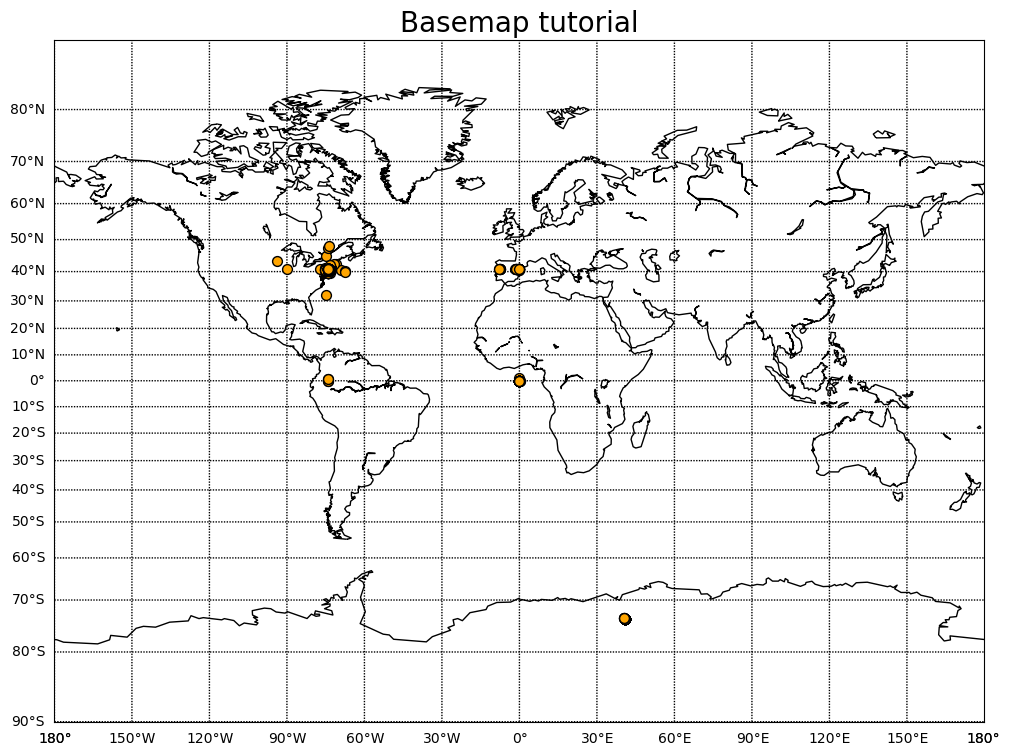

In [39]:
def plot_basemap(df, long_col='pickup_longitude', lat_col='pickup_latitude', llcrnrlat='-90',
                 urcrnrlat='90',llcrnrlon='-180',urcrnrlon='180'):
    fig = plt.figure(figsize=(12,9))
    
    m = Basemap(projection='mill',
               llcrnrlat = llcrnrlat,
               urcrnrlat = urcrnrlat,
               llcrnrlon = llcrnrlon,
               urcrnrlon = urcrnrlon,
               resolution = 'c')
    
    m.drawcoastlines()
    
    m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
    m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
    
    colors = ['green', 'darkblue', 'yellow', 'red', 'blue', 'orange']
    
    m.scatter(df[long_col],df[lat_col],latlon=True, s=50, c=colors[5], marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)
    
    plt.title('Basemap tutorial', fontsize=20)

    #m.bluemarble()
    plt.show()
plot_basemap(df)

Видим точки распологающиеся в Антарктиде, рассмотри их подробнее

In [40]:
df[df['pickup_longitude'].apply(lambda a: True if str(a).split('.')[0] == '0' else False)]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
7,2.5,2012-12-11 13:52:00+00:00,0.0,0.0,0.0,0.0,1
11,8.5,2011-05-23 22:15:00+00:00,0.0,0.0,0.0,0.0,1
65,6.0,2014-05-05 19:27:00+00:00,0.0,0.0,0.0,0.0,1
92,6.1,2011-12-02 14:07:00+00:00,0.0,0.0,0.0,0.0,1
120,6.5,2010-08-20 19:39:48+00:00,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...
199718,4.9,2011-08-19 07:16:00+00:00,0.0,0.0,0.0,0.0,1
199724,7.5,2013-10-11 11:25:41+00:00,0.0,0.0,0.0,0.0,1
199880,6.5,2014-02-22 06:45:46+00:00,0.0,0.0,0.0,0.0,1
199883,12.5,2012-09-10 17:39:00+00:00,0.0,0.0,0.0,0.0,2


In [41]:
df = df[df['pickup_latitude'].apply(lambda a: False if str(a).split('.')[0] == '0' else True)]
df = df[df['dropoff_latitude'].apply(lambda a: False if str(a).split('.')[0] == '0' else True)]
df = df[df['pickup_longitude'].apply(lambda a: False if str(a).split('.')[0] == '0' else True)]
df = df[df['dropoff_longitude'].apply(lambda a: False if str(a).split('.')[0] == '0' else True)]

In [42]:
Counter(df['pickup_latitude'].apply(lambda a: str(a).split('.')[0])) ,
Counter(df['dropoff_latitude'].apply(lambda a: str(a).split('.')[0])) ,
Counter(df['pickup_longitude'].apply(lambda a: str(a).split('.')[0])) ,
Counter(df['dropoff_longitude'].apply(lambda a: str(a).split('.')[0]))

Counter({'-73': 169529,
         '-74': 26332,
         '40': 102,
         '-75': 8,
         '-0': 7,
         '-72': 5,
         '-7': 5,
         '-71': 3,
         '-4': 1,
         '-54': 1,
         '-69': 1,
         '-63': 1,
         '-3': 1})

In [43]:
df = df[df['pickup_latitude'].apply(lambda a: False if abs(int(str(a).split('.')[0])) in range(0,10) else True)]
df = df[df['dropoff_latitude'].apply(lambda a: False if abs(int(str(a).split('.')[0])) in range(0,10) else True)]
df = df[df['pickup_longitude'].apply(lambda a: False if abs(int(str(a).split('.')[0])) in range(0,10) else True)]
df = df[df['dropoff_longitude'].apply(lambda a: False if abs(int(str(a).split('.')[0])) in range(0,10) else True)]

Фильтруем значения координат, оставляя только те которые не находятся в промежутке от 0 до 10

Рассмотрим только одну страну

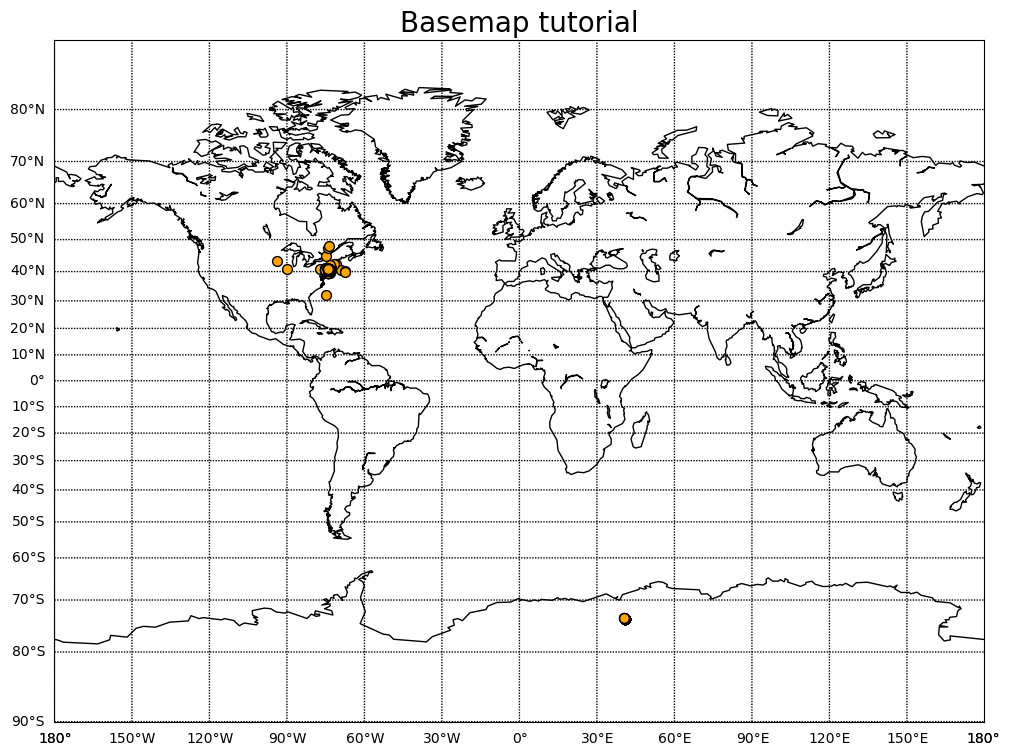

In [44]:
plot_basemap(df)

In [45]:
idx = df[df['dropoff_longitude'].apply(lambda a: True if int(str(a).split('.')[0]) >-30 else False)].index
df.loc[idx, ['dropoff_longitude', 'dropoff_latitude']] = df.loc[idx, ['dropoff_latitude', 'dropoff_longitude']].to_numpy()

idx_2 = df[df['pickup_longitude'].apply(lambda a: True if int(str(a).split('.')[0]) >-30 else False)].index
df.loc[idx_2, ['pickup_longitude', 'pickup_latitude']] = df.loc[idx_2, ['pickup_latitude', 'pickup_longitude']].to_numpy()

Оставим точи находящиеся в пределах 30 градусов

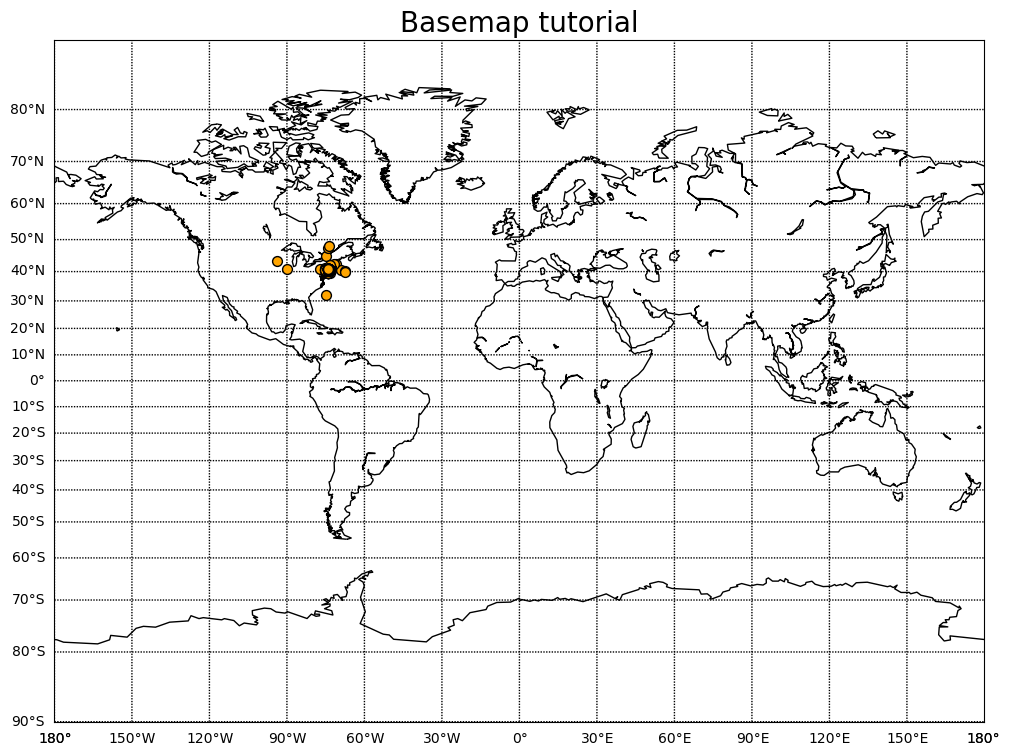

In [46]:
plot_basemap(df)

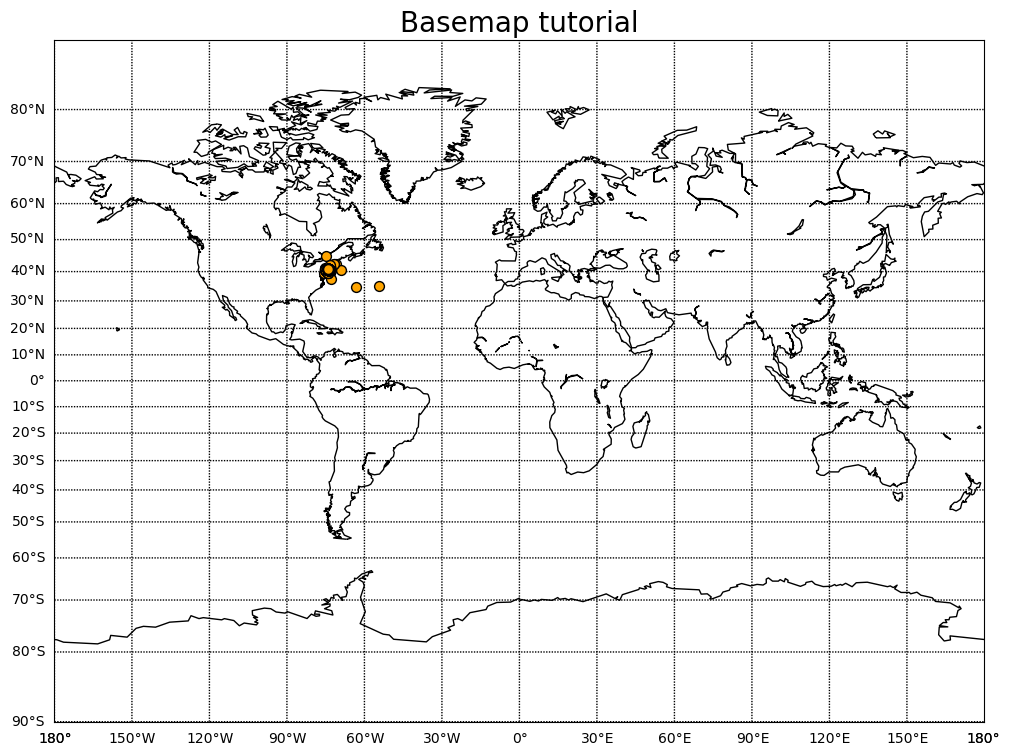

In [47]:
plot_basemap(df,'dropoff_longitude','dropoff_latitude')

In [49]:
from geopy.distance import geodesic 
def cal_distance(df):
    pck_up = (df.pickup_latitude, df.pickup_longitude)
    drp = (df.dropoff_latitude,  df.dropoff_longitude)
    return geodesic(pck_up, drp).km
df['df_distance'] = df.apply(cal_distance, axis=1)

Посчитаем расстояние поездки

In [50]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,df_distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.681111
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.454363
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.039603
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661442
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.483730


In [51]:
df.describe(include='all')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,df_distance
count,195964.000000,195964,195964.000000,195964.000000,195964.000000,195964.000000,195964.000000,195964.000000
mean,11.343111,2012-03-21 15:22:34.521299968+00:00,-73.975266,40.750961,-73.974009,40.751124,1.685095,3.400514
min,-52.000000,2009-01-01 01:15:22+00:00,-93.824668,32.005119,-75.458979,34.894485,0.000000,0.000000
25%,6.000000,2010-08-21 09:38:22.500000+00:00,-73.992275,40.736444,-73.991597,40.735323,1.000000,1.256211
50%,8.500000,2012-03-21 07:25:47.500000+00:00,-73.982108,40.753307,-73.980536,40.753749,1.000000,2.157382
75%,12.500000,2013-10-19 00:31:26.249999872+00:00,-73.968353,40.767556,-73.965373,40.768335,2.000000,3.908178
max,499.000000,2015-06-30 23:40:39+00:00,-67.370360,48.018760,-54.294363,45.031598,208.000000,3495.406518
std,9.800026,NaN,0.075139,0.045566,0.066485,0.042572,1.388011,10.476088


In [52]:
df.sort_values(by='df_distance', ascending=False)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,df_distance
40908,8.1,2009-07-30 19:51:48+00:00,-93.824668,43.486656,-54.294363,35.174169,1,3495.406518
73663,8.1,2012-07-17 19:52:00+00:00,-89.933333,40.709452,-74.008302,40.744527,1,1343.523298
158247,8.1,2010-05-05 16:57:29+00:00,-73.974777,40.758980,-63.156252,34.894485,1,1152.220624
173360,9.7,2011-01-05 14:38:22+00:00,-75.026743,32.005119,-73.983341,40.718626,1,971.407575
158815,8.0,2014-04-30 07:17:34+00:00,-73.619358,48.018760,-73.983377,40.760342,1,807.073292
...,...,...,...,...,...,...,...,...
151794,5.5,2015-04-19 00:48:56+00:00,-73.983040,40.776726,-73.983040,40.776726,5,0.000000
21452,9.7,2011-06-06 19:44:00+00:00,-73.937475,40.758242,-73.937475,40.758242,1,0.000000
21464,2.5,2014-08-27 14:52:10+00:00,-73.975333,40.621421,-73.975333,40.621421,1,0.000000
133339,14.1,2009-09-26 16:02:39+00:00,-73.915152,40.750426,-73.915152,40.750426,1,0.000000


In [53]:
df.describe(include='all')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,df_distance
count,195964.000000,195964,195964.000000,195964.000000,195964.000000,195964.000000,195964.000000,195964.000000
mean,11.343111,2012-03-21 15:22:34.521299968+00:00,-73.975266,40.750961,-73.974009,40.751124,1.685095,3.400514
min,-52.000000,2009-01-01 01:15:22+00:00,-93.824668,32.005119,-75.458979,34.894485,0.000000,0.000000
25%,6.000000,2010-08-21 09:38:22.500000+00:00,-73.992275,40.736444,-73.991597,40.735323,1.000000,1.256211
50%,8.500000,2012-03-21 07:25:47.500000+00:00,-73.982108,40.753307,-73.980536,40.753749,1.000000,2.157382
75%,12.500000,2013-10-19 00:31:26.249999872+00:00,-73.968353,40.767556,-73.965373,40.768335,2.000000,3.908178
max,499.000000,2015-06-30 23:40:39+00:00,-67.370360,48.018760,-54.294363,45.031598,208.000000,3495.406518
std,9.800026,NaN,0.075139,0.045566,0.066485,0.042572,1.388011,10.476088


In [54]:
df[df['passenger_count'] > 10]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,df_distance
113038,11.7,2010-12-28 08:20:00+00:00,-73.937795,40.758498,-73.937835,40.758415,208,0.009816


In [55]:
df = df.drop(index=113038)

Уберем строчки, где указано более 10 пассажиров

In [56]:
df[df['fare_amount'] < 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,df_distance
63395,-5.00,2015-03-03 23:07:41+00:00,-73.992249,40.748936,-73.988518,40.748180,1,0.326052
71246,-3.30,2010-02-11 21:47:10+00:00,-73.952725,40.768235,-73.949928,40.772208,2,0.500420
79903,-3.50,2015-05-01 14:43:02+00:00,-73.982430,40.775024,-73.981750,40.778439,1,0.383449
89322,-49.57,2010-03-09 08:26:10+00:00,-73.972772,40.785657,-73.972867,40.785500,5,0.019190
92063,-23.70,2010-03-12 08:49:10+00:00,-73.952740,40.768233,-74.007028,40.707338,3,8.170467
98875,-52.00,2015-03-20 21:31:14+00:00,-74.000359,40.728729,-74.005699,40.728680,5,0.451201
104080,-7.30,2010-03-09 20:25:10+00:00,-73.952623,40.766942,-73.953787,40.784882,1,1.994651
139272,-6.90,2010-02-23 18:52:10+00:00,-73.988727,40.736445,-73.977622,40.750487,1,1.819695
148803,-5.70,2010-02-12 10:50:10+00:00,-73.977300,40.742783,-73.988837,40.747465,3,1.104436
150301,-3.00,2015-06-18 07:41:12+00:00,-74.004646,40.707355,-74.004013,40.707699,1,0.065705


In [57]:
df = df.drop(df[df['fare_amount'] < 0].index)


Уберем строчки с отрицательной стоимостью

In [58]:
df.describe(include='all')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,df_distance
count,195947.000000,195947,195947.000000,195947.000000,195947.000000,195947.000000,195947.000000,195947.000000
mean,11.345244,2012-03-21 15:04:11.246816512+00:00,-73.975267,40.750961,-73.974008,40.751124,1.684017,3.400604
min,0.000000,2009-01-01 01:15:22+00:00,-93.824668,32.005119,-75.458979,34.894485,0.000000,0.000000
25%,6.000000,2010-08-21 10:24:00+00:00,-73.992275,40.736443,-73.991597,40.735323,1.000000,1.256361
50%,8.500000,2012-03-21 07:26:35+00:00,-73.982108,40.753307,-73.980535,40.753749,1.000000,2.157518
75%,12.500000,2013-10-19 00:05:30+00:00,-73.968353,40.767556,-73.965373,40.768335,2.000000,3.908363
max,499.000000,2015-06-30 23:40:39+00:00,-67.370360,48.018760,-54.294363,45.031598,6.000000,3495.406518
std,9.796264,NaN,0.075141,0.045567,0.066488,0.042573,1.307420,10.476437


In [59]:
df[df['fare_amount'] < 2]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,df_distance
20744,0.00,2015-04-22 23:25:07+00:00,-73.658897,40.805199,-73.658897,40.805199,1,0.000000
21658,0.01,2015-05-31 16:13:41+00:00,-73.991692,40.770802,-73.991692,40.770824,1,0.002542
22182,0.00,2010-03-20 02:59:51+00:00,-73.994366,40.755395,-73.998718,40.854853,2,11.050929
149342,0.11,2010-03-07 19:11:43+00:00,-73.997221,40.721345,-73.997252,40.721344,1,0.002621
156738,0.00,2015-02-17 08:48:08+00:00,-73.937714,40.758541,-73.937721,40.758541,1,0.000644
191228,0.01,2010-03-08 18:44:57+00:00,-74.000523,40.725868,-73.956960,40.780855,1,7.128817


In [60]:
df = df.drop(df[df['fare_amount'] < 2].index)

Уберем излишне маленькую стоимость

In [61]:
df[df['df_distance'] == 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,df_distance
5,4.90,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.0
48,56.80,2013-01-03 22:24:41+00:00,-73.993498,40.764686,-73.993498,40.764686,1,0.0
84,49.57,2009-08-07 10:43:07+00:00,-73.975058,40.788820,-73.975058,40.788820,1,0.0
166,4.50,2014-01-22 21:01:18+00:00,-73.992937,40.757780,-73.992937,40.757780,1,0.0
361,10.10,2009-08-24 17:25:00+00:00,-73.928705,40.753475,-73.928705,40.753475,1,0.0
...,...,...,...,...,...,...,...,...
199448,5.70,2010-07-24 21:16:00+00:00,-73.924907,40.745833,-73.924907,40.745833,3,0.0
199612,4.50,2013-02-17 11:27:00+00:00,-73.969717,40.765832,-73.969717,40.765832,3,0.0
199647,2.50,2009-06-07 02:07:26+00:00,-73.956623,40.771633,-73.956623,40.771633,1,0.0
199917,4.50,2013-06-24 22:17:43+00:00,-73.793768,40.656939,-73.793768,40.656939,1,0.0


In [62]:
df[df['df_distance'] == 0]["df_distance"].count()/df.shape[0]


0.01042150443245671

In [63]:
df = df.drop(df[df['df_distance'] == 0].index)

Избавимся от строчек с нулевым расстоянием

In [64]:
df['ppk'] = round(df['fare_amount']/df['df_distance'],2)

Рассчитаем цену за километр

In [65]:
df.describe(include='all')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,df_distance,ppk
count,193899.000000,193899,193899.000000,193899.000000,193899.000000,193899.000000,193899.000000,193899.000000,193899.000000
mean,11.348283,2012-03-23 14:22:15.376324864+00:00,-73.975646,40.750853,-73.974375,40.751017,1.683815,3.436428,85.096211
min,2.500000,2009-01-01 01:15:22+00:00,-93.824668,32.005119,-75.458979,34.894485,0.000000,0.000084,0.000000
25%,6.000000,2010-08-23 12:55:00+00:00,-73.992285,40.736474,-73.991603,40.735352,1.000000,1.281091,2.970000
50%,8.500000,2012-03-23 18:07:00+00:00,-73.982133,40.753312,-73.980577,40.753758,1.000000,2.180754,3.820000
75%,12.500000,2013-10-21 21:05:49+00:00,-73.968485,40.767550,-73.965565,40.768335,2.000000,3.939934,5.050000
max,499.000000,2015-06-30 23:40:39+00:00,-67.370360,48.018760,-54.294363,45.031598,6.000000,3495.406518,666295.800000
std,9.732480,NaN,0.073434,0.043986,0.064459,0.040842,1.307038,10.525746,4620.484032


In [66]:
df.shape

(193899, 9)

In [67]:
df[(df['ppk']>45) | (df['ppk']<1)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,df_distance,ppk
87,4.50,2010-09-22 12:15:00+00:00,-73.981920,40.761172,-74.016152,40.704765,1,6.899185,0.65
427,49.57,2010-07-04 17:10:17+00:00,-73.787044,40.641077,-73.786471,40.641836,1,0.097228,509.83
457,11.70,2012-04-25 20:49:00+00:00,-74.030417,40.807683,-74.027813,40.806813,1,0.240028,48.74
583,13.70,2010-09-12 16:26:59+00:00,-73.972258,40.761745,-73.751885,40.719627,4,19.192229,0.71
620,12.00,2013-12-06 13:58:00+00:00,-73.989780,40.725937,-73.989818,40.725280,5,0.073030,164.32
...,...,...,...,...,...,...,...,...,...
199403,7.00,2013-01-20 17:58:29+00:00,-67.370360,39.999790,-73.971058,40.753000,1,566.615908,0.01
199635,20.90,2011-03-05 13:08:00+00:00,-73.905370,40.741812,-73.905950,40.742342,2,0.076576,272.93
199643,2.50,2013-01-08 06:37:00+00:00,-73.928475,40.746455,-73.928463,40.746470,6,0.001950,1282.17
199658,2.50,2012-08-08 16:21:00+00:00,-73.968923,40.749848,-73.968913,40.749905,5,0.006386,391.49


Видим много очень больших или очень маленьких значений цены с несоответствующими значениями расстояний

In [68]:
df = df[(df['ppk']<=45) & (df['ppk']>1)]

Оставим значения цены за км в пределах от 1 до 45

In [69]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,df_distance,ppk
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.681111,4.46
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.454363,3.14
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.039603,2.56
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661442,3.19
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.483730,3.57


In [70]:
df.groupby('passenger_count').count()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,df_distance,ppk
passenger_count,,,,,,,,
0,678,678,678,678,678,678,678,678
1,132804,132804,132804,132804,132804,132804,132804,132804
2,28324,28324,28324,28324,28324,28324,28324,28324
3,8574,8574,8574,8574,8574,8574,8574,8574
4,4109,4109,4109,4109,4109,4109,4109,4109
5,13447,13447,13447,13447,13447,13447,13447,13447
6,4132,4132,4132,4132,4132,4132,4132,4132


Видим что есть записи с нулевым кол-вом пассажиров, уберем их

In [71]:
df = df[df['passenger_count']!=0]

In [77]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['weekDay'] = df['pickup_datetime'].dt.weekday
df['month'] = df['pickup_datetime'].dt.month
df['DATE'] = df['pickup_datetime'].dt.date

Разделим столбец pickup_datetime на час, день недели , месяц

In [78]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,df_distance,ppk,hour,weekDay,month,DATE
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.681111,4.46,19,3,5,2015-05-07
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.454363,3.14,20,4,7,2009-07-17
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.039603,2.56,21,0,8,2009-08-24
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661442,3.19,8,4,6,2009-06-26
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.483730,3.57,17,3,8,2014-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112128,26.76,10,6,10,2012-10-28
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.879635,3.99,1,4,3,2014-03-14
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.867916,2.40,0,0,6,2009-06-29
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.536552,4.10,14,2,5,2015-05-20


In [79]:
df.DATE.min(), df.DATE.max()

(datetime.date(2009, 1, 1), datetime.date(2015, 6, 30))

Даты в нормальном диапазоне

In [80]:
df=df.drop("DATE",axis=1)


<Axes: xlabel='passenger_count', ylabel='count'>

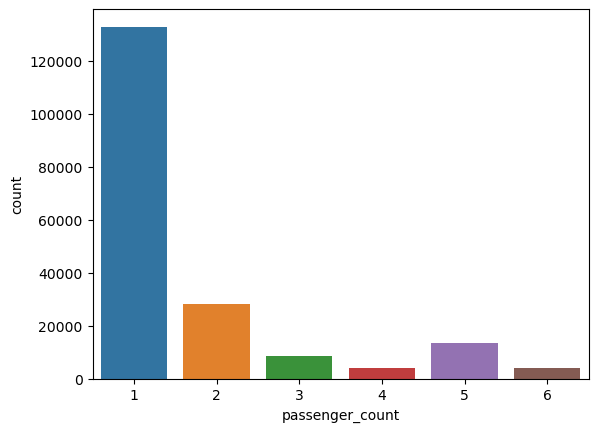

In [81]:
sns.countplot(x="passenger_count", data=df)

<Axes: xlabel='weekDay', ylabel='count'>

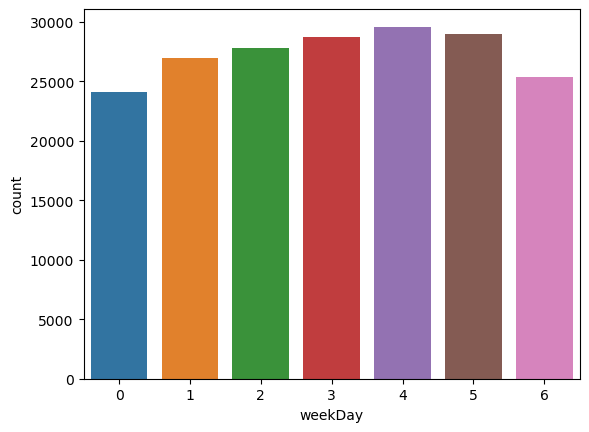

In [87]:
sns.countplot(x="weekDay", data=df)

<Axes: xlabel='month', ylabel='count'>

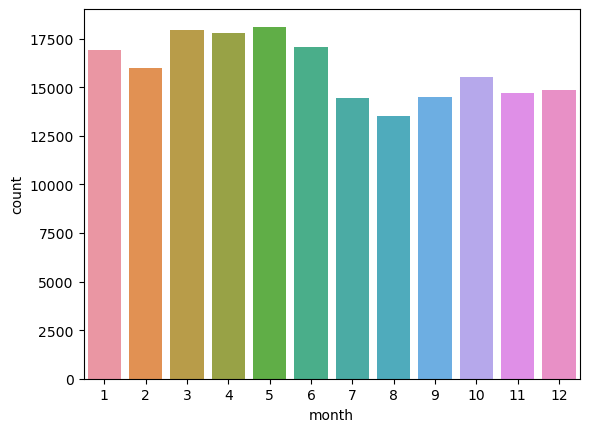

In [88]:
sns.countplot(x="month", data=df)

<Axes: xlabel='hour', ylabel='count'>

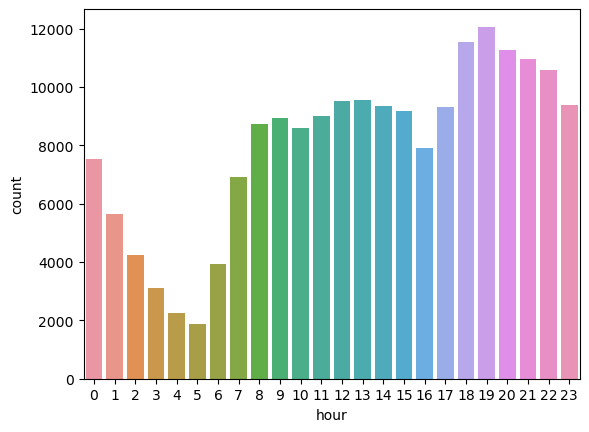

In [117]:
sns.countplot(x="hour", data=df)

<Axes: xlabel='df_distance', ylabel='fare_amount'>

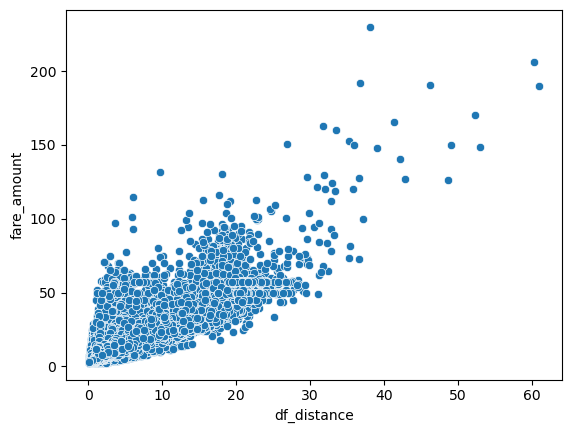

In [82]:
sns.scatterplot(x=df['df_distance'], y=df['fare_amount'])

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

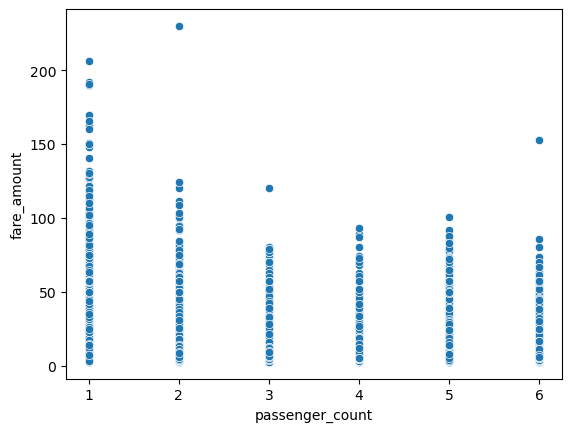

In [83]:
sns.scatterplot(x=df['passenger_count'], y=df['fare_amount'])

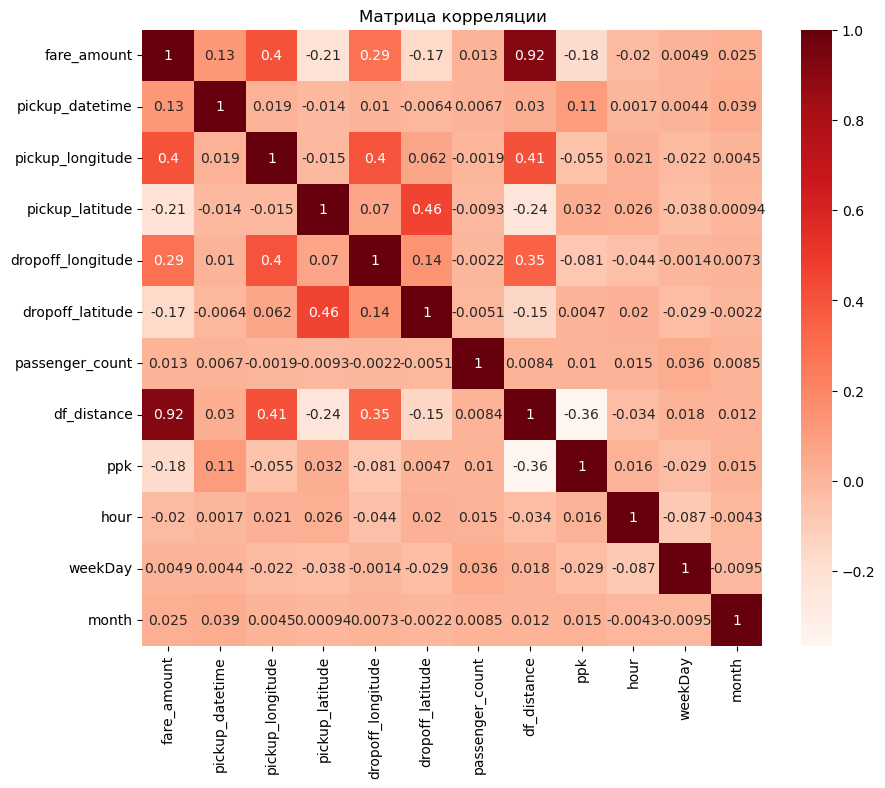

In [85]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Матрица корреляции')
plt.show()

Есть корреляция между параметрами fare_amount и df_distance

C:\Users\noutb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

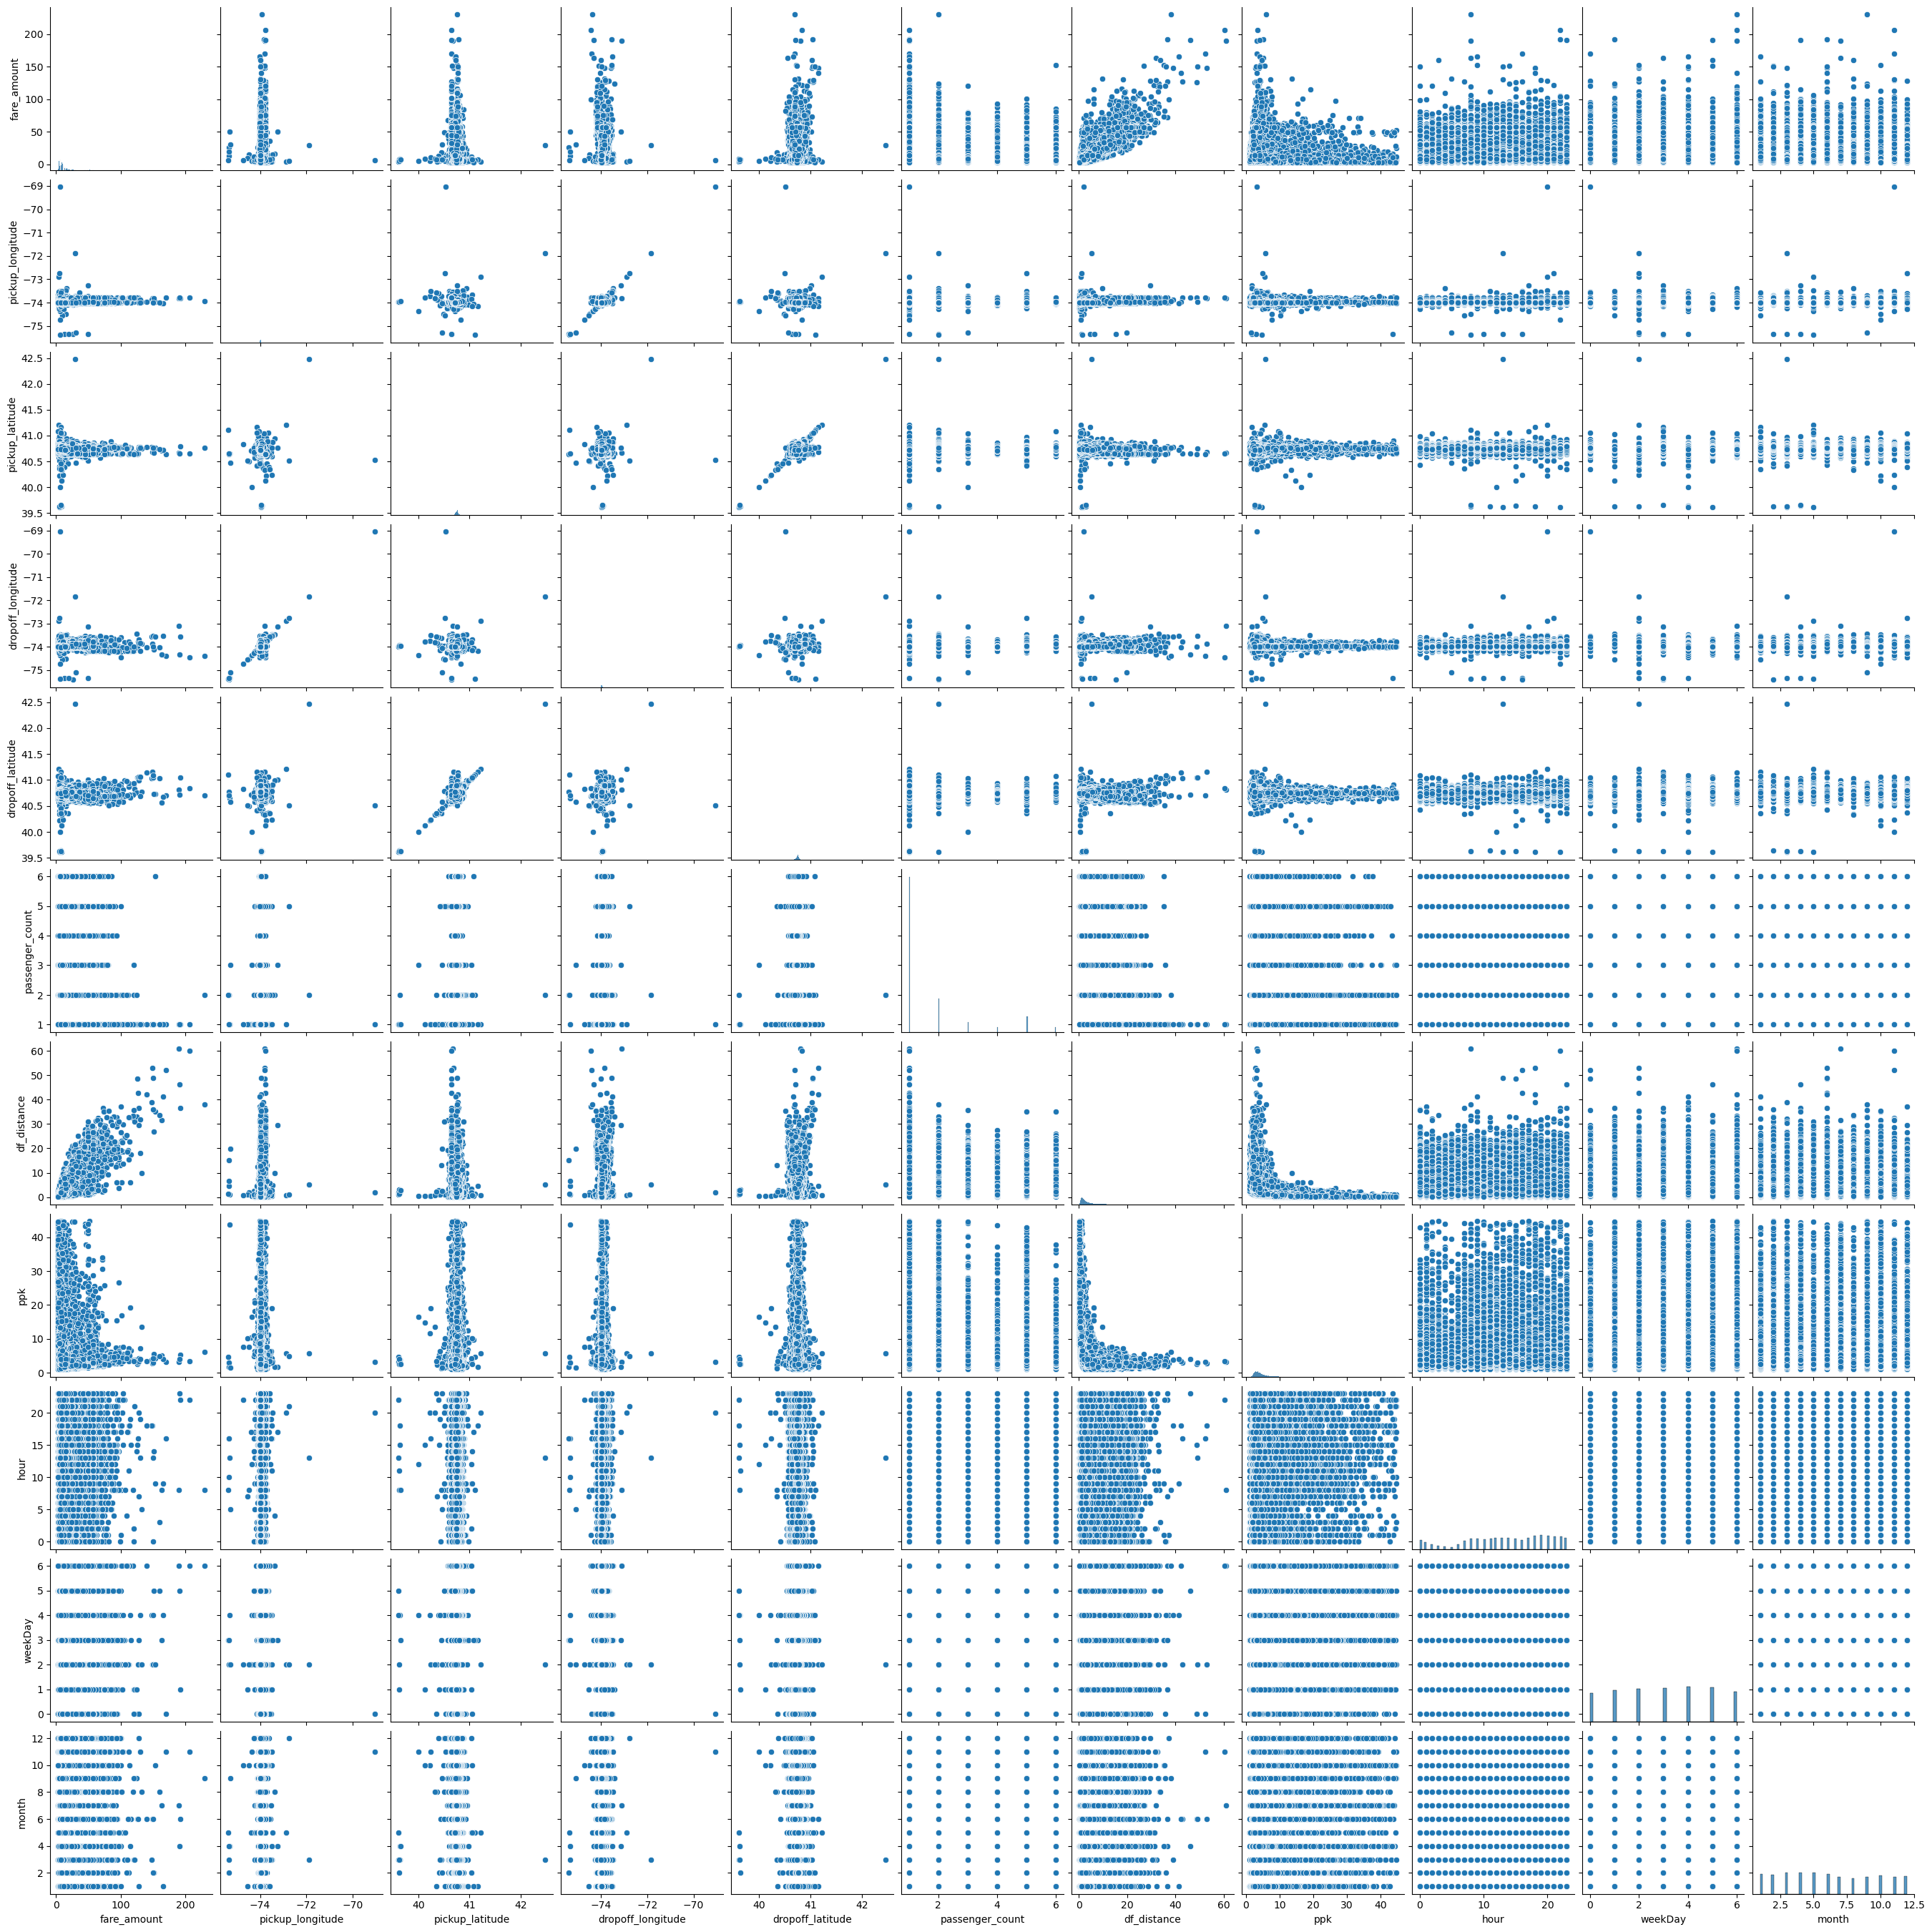

In [86]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

## Обучение модели

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [90]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [92]:
X = df.drop('fare_amount',axis=1)
X = df.drop('pickup_datetime',axis=1)
y = df['fare_amount']

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

### Линейная регрессия

In [94]:
reg = LinearRegression()

In [95]:
reg.fit(X_train,Y_train)

LinearRegression()

In [96]:
reg_pred=reg.predict(X_test)

In [97]:
mse = round(mean_squared_error(Y_test, reg_pred), 3)
rmse = round(np.sqrt(mse), 3)

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test,reg_pred))
print('mean-squared-error',metrics.mean_squared_error(Y_test,reg_pred))
print('r2score',metrics.r2_score(Y_test,reg_pred))

Root Mean Squared Error of the model is : 0.0
mean_Absolute-Error 1.2628304371792113e-12
mean-squared-error 4.093693120375555e-24
r2score 1.0


Модель определяет все значения 

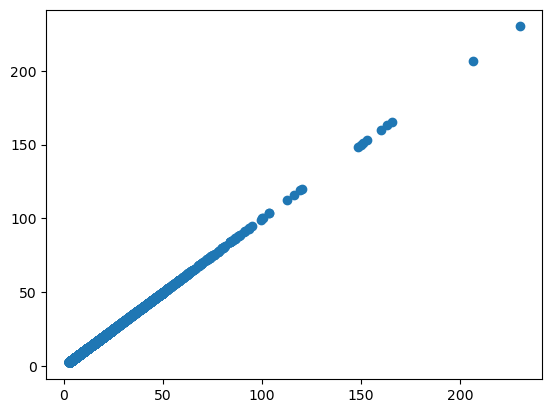

In [98]:
plt.scatter(Y_test,reg_pred)

In [99]:
kf = KFold(5)
cross_val = cross_val_score(reg, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [100]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [1. 1. 1. 1. 1.]
Train CV mean : 1.0


In [101]:
kf = KFold(10)
cross_val = cross_val_score(reg, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [102]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train CV mean : 1.0


Хорошо обучается на тренировочных данных

In [103]:
from sklearn.ensemble import BaggingRegressor

# Bagging
bagging_model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10, random_state=0)
bagging_model.fit(X_train, Y_train)

# Предсказание и оценка модели
y_pred = bagging_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


C:\Users\noutb\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 7.671803568165454e-26
R² Score: 1.0


In [119]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [121]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, Y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)


print_evaluate(Y_test, test_pred)

print_evaluate(Y_train, train_pred)

MAE: 0.013320424459295988
MSE: 0.00045528885317906736
RMSE: 0.021337498756392872
R2 Square 0.9999948940065382
__________________________________
MAE: 0.013419253494472875
MSE: 0.00045702722789943493
RMSE: 0.021378195150653735
R2 Square 0.999994894364893
__________________________________


### DecisionTreeRegressor

In [104]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

DecisionTreeRegressor()

In [105]:
dtr_pred=dtr.predict(X_test)

In [106]:
mse = round(mean_squared_error(Y_test, dtr_pred), 3)
rmse = round(np.sqrt(mse), 3)

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test,dtr_pred))
print('mean-squared-error',metrics.mean_squared_error(Y_test,dtr_pred))
print('r2score',metrics.r2_score(Y_test,dtr_pred))

Root Mean Squared Error of the model is : 0.187
mean_Absolute-Error 0.0022798125991364037
mean-squared-error 0.03526463939251437
r2score 0.999604512570619


Модель очень хорошо предсказывает данные

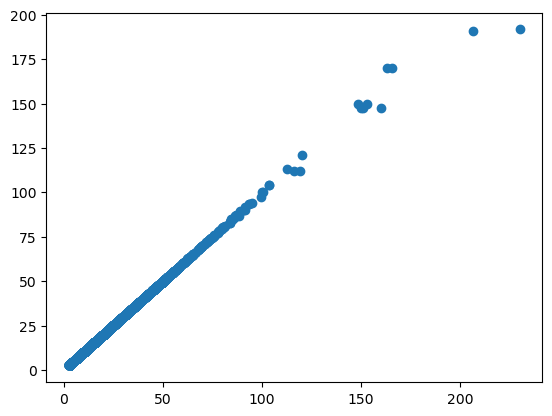

In [107]:
plt.scatter(Y_test,dtr_pred)

In [108]:
kf = KFold(5)
cross_val = cross_val_score(dtr, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [109]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.99959846 0.99992047 0.99995576 0.99973141 0.99850893]
Train CV mean : 1.0


In [110]:
kf = KFold(10)
cross_val = cross_val_score(dtr, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [111]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3)
     )

Train CV scores : [0.99995133 0.99999063 0.9996279  0.99999368 0.99999021 0.99998636
 0.99920086 0.99991563 0.99993644 0.99999099]
Train CV mean : 1.0


Модель хоршо обучается на тренировочных данных

### RandomForestRegressor

In [112]:
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [113]:
rfr_pred = rfr.predict(X_test)

In [114]:
mse = round(mean_squared_error(Y_test, rfr_pred), 3)
rmse = round(np.sqrt(mse), 3)

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test,rfr_pred))
print('mean-squared-error',metrics.mean_squared_error(Y_test,rfr_pred))
print('r2score',metrics.r2_score(Y_test,rfr_pred))

Root Mean Squared Error of the model is : 0.255
mean_Absolute-Error 0.0023829005347221965
mean-squared-error 0.06509346909869933
r2score 0.999269986898865


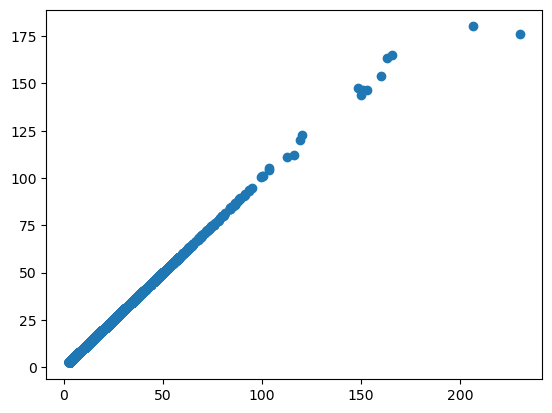

In [115]:
plt.scatter(Y_test,rfr_pred)

In [ ]:
kf = KFold(5)
cross_val = cross_val_score(rfr, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [ ]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

In [ ]:
kf = KFold(10)
cross_val = cross_val_score(rfr, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [ ]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

## Вывод

Просмотрели выборку данных, избавились от неправильных значений. Рассчитали расстояние пути, разделили дату на день недели, 
месяц, час дня. Узнали, что чаще всего ездит один пассажир, больше всего данных о поездках в апреле, самый популярный день недели - пятница, самое частое время - 19 ч.

Выявили зависимость между дистанцией и ценой поездки.

Обучили три модели RandomForestRegressor, DecisionTreeRegressor, LinearRegression
Наибольший результат показала LinearRegression с r2=1, что не особо хорошо потому что это переобучение модели. Но остальные модели показывают приближенный к этому результат.

Все модели хорошо обучаются на тренировочных данных с помощью кросс-валидации.